<a href="https://colab.research.google.com/github/julianovale/PO450/blob/main/Semana04_PO450_Atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Juliano Cesar Rodrigues Vale - RA: 265750

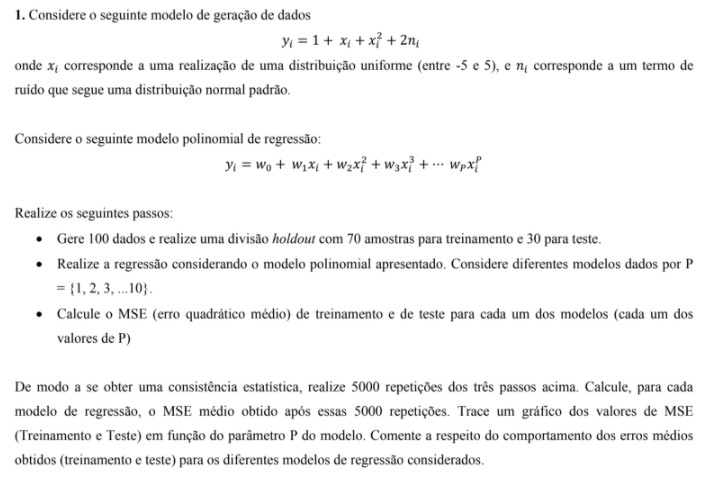

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [39]:
# Definição da função
def model_f(x):
  y = 1 + x + x**2
  return y

def roda(vezes=5000, ordem=5):
  MSE_train_hist = []
  MSE_test_hist = []

  for i in range(vezes):
    x = (xmax-xmin)*np.random.rand(n, 1)+xmin
    noise = np.random.randn(n, 1)
    y = model_f(x)+2*noise
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=prop_test)
    model_reg_lin = make_pipeline(PolynomialFeatures(ordem),LinearRegression())
    model_reg_lin.fit(x_train, y_train)
    y_pred_train = model_reg_lin.predict(x_train)
    y_pred_test = model_reg_lin.predict(x_test)
    res_train = y_train - y_pred_train
    res_test = y_test - y_pred_test 

    MSE_train = mean_squared_error(y_train, y_pred_train)
    MSE_test = mean_squared_error(y_test, y_pred_test)
    MSE_train_hist.append(MSE_train)
    MSE_test_hist.append(MSE_test)
    MSE_train_mean = np.mean(MSE_train_hist)
    MSE_test_mean = np.mean(MSE_test_hist)

  return MSE_train_mean, MSE_test_mean

In [40]:
#parâmetros
n = 100
xmin = -5
xmax = 5
ordem = 10
vezes = 5000
prop_test = 0.3

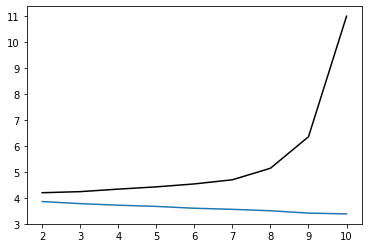

In [44]:
MSE_train_mean_hist = []
MSE_test_mean_hist = []
eixo_x = []

for i in range(ordem-1):
  MSE_train_mean, MSE_test_mean = roda(vezes, i+2)
  MSE_train_mean_hist.append(MSE_train_mean)
  MSE_test_mean_hist.append(MSE_test_mean)
  eixo_x.append(i+2)

plt.plot(eixo_x, MSE_train_mean_hist)
plt.plot(eixo_x, MSE_test_mean_hist, 'k')
plt.show()

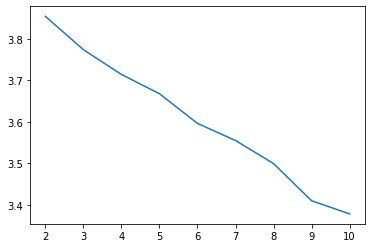

In [47]:
plt.plot(eixo_x, MSE_train_mean_hist);

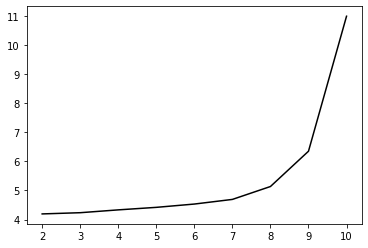

In [48]:
plt.plot(eixo_x, MSE_test_mean_hist, 'k');

# Comentários:

À medida que vou aumentando a complexidade do modelo (utilizando polinômio de maior grau), o MSE do treinamento vai caindo, ao passo que o MSE do teste vai aumentando. Isso evidencia o sobreajuste (overfitting) para os maiores polinômios. 
Fica evidente que dos polinômios testados, de 2 a 10, o que apresenta melhor potencial de utilização devido à relação MSE de treinamento x MSE de teste é o de menor complexidade, ou seja, o polinômio de ordem 2 (que é similar à função que gerou os dados).